# Visuals
Applying Visualization shown in last notebook. This will be saved, be more clear and leaves burden from one file

# 1) Importing key modules

In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

Loading BokehJS ...

In [5]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go

In [6]:
# plotly
import plotly.graph_objs as go
import plotly.offline as py
from plotly.graph_objs import *
import plotly.figure_factory as ff

py.init_notebook_mode()

In [7]:
import nltk
import sys
import re, numpy as np, pandas as pd

# 2)- Loading data

In [8]:
import pickle
#Loading from firm cleaned file
patent = pd.read_pickle('eda.pkl')
patent.shape

(43431, 37)

In [9]:
patent_abst=patent['appln_abstr']

In [10]:
chars = list(set(patent_abst)) 
data_size, vocab_size = len(patent_abst), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 43431
Patent data has unique chars 37196


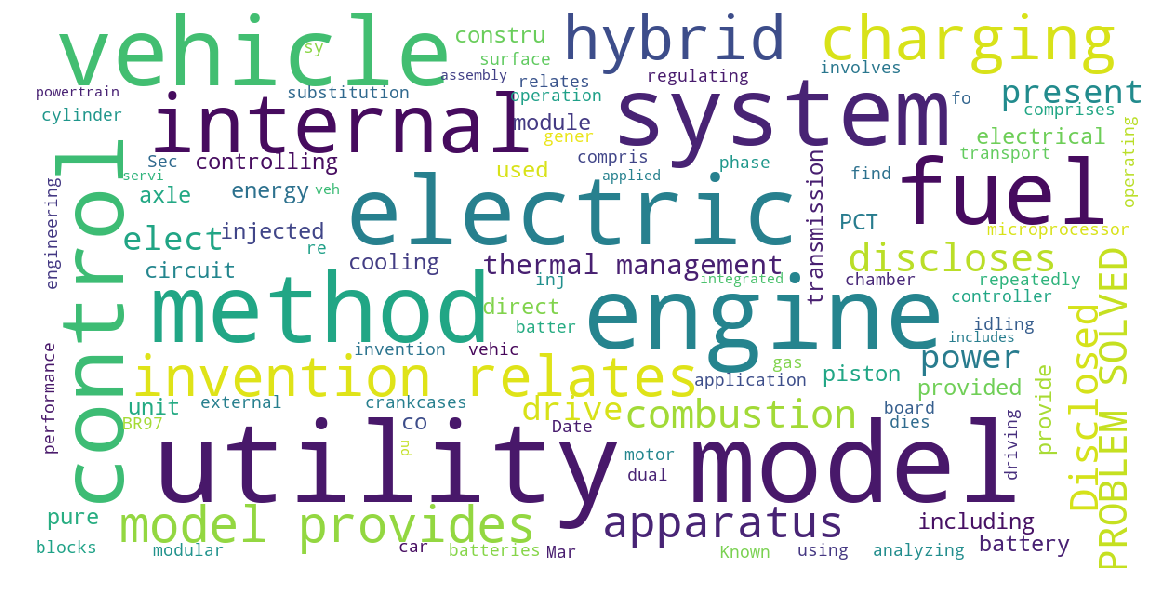

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(patent['appln_abstr'].dropna())

# 3)- Working with topic model analysis

In [12]:
# load topic model dataset
df_dominant_topic = pd.read_pickle('top08_topic_dominant.pkl')
df_dominant_topic.shape

(43431, 5)

In [13]:
# Loading model i.e TF-IDF from File 3

from gensim.models import LdaModel
optimal_model  = LdaModel.load('optimal_topic_model')

In [14]:
# Load corpus and id2word

corpus_tfidf  = LdaModel.load('corpus_tfidf')
id2word  = LdaModel.load('id2word')

In [15]:
df_dominant_topic.head()

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             5.0              0.3857   
1            1             5.0              0.7969   
2            2             2.0              0.4514   
3            3             6.0              0.7163   
4            4             4.0              0.5670   

                                            Keywords  \
0  voltage, battery, circuit, power, module, dc, ...   
1  voltage, battery, circuit, power, module, dc, ...   
2  charge, pile, automobile, utility, model, body...   
3  valve, combustion, fuel, oil, cylinder, pressu...   
4  engine, torque, clutch, mode, speed, motor, ge...   

                                                Text  
0  [electrical, energy, system, include, electric...  
1  [electrical, energy, system, include, electric...  
2  [piston, surface, combustion, chamber, side, p...  
3  [idle, phase, fuel, repeatedly, inject, cycle,...  
4  [invention, relate, module, constructed, inter...

### a)- Find count of each topic in document

In [16]:
df_dominant_topic.Dominant_Topic.value_counts()

4.0    15371
5.0     7647
2.0     6455
7.0     5195
6.0     4022
1.0     3303
0.0      925
3.0      513
Name: Dominant_Topic, dtype: int64

In [17]:
value_counts = df_dominant_topic['Dominant_Topic'].value_counts(dropna=True, sort=True)
data = value_counts.rename_axis('Topic-Number').reset_index(name='Counts')
df_val_counts = pd.DataFrame(data)
df_val_counts

Topic-Number  Counts
0           4.0   15371
1           5.0    7647
2           2.0    6455
3           7.0    5195
4           6.0    4022
5           1.0    3303
6           0.0     925
7           3.0     513

### b)- wordCloud

In [18]:
import nltk; nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\69785hsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

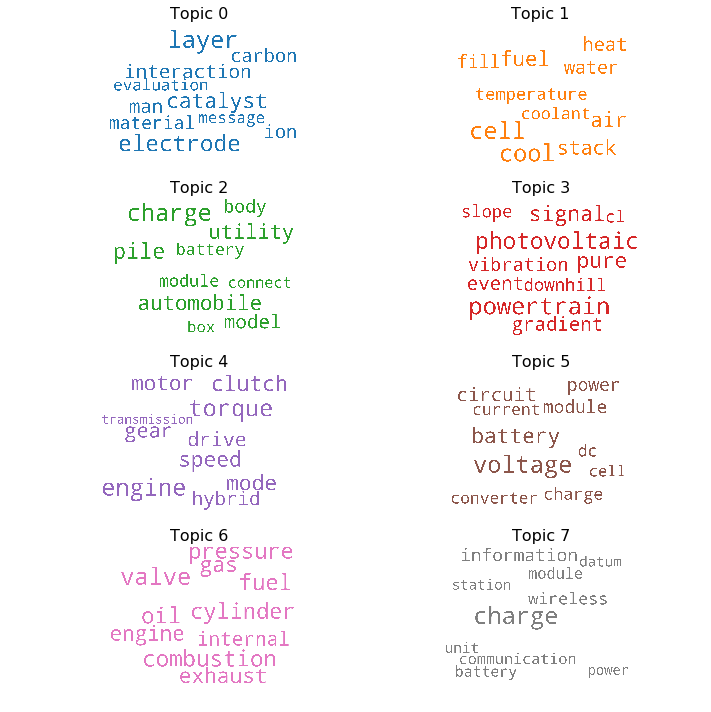

In [20]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True) # watch this value

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1]) # for 8 topics
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### c)- Barplot

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



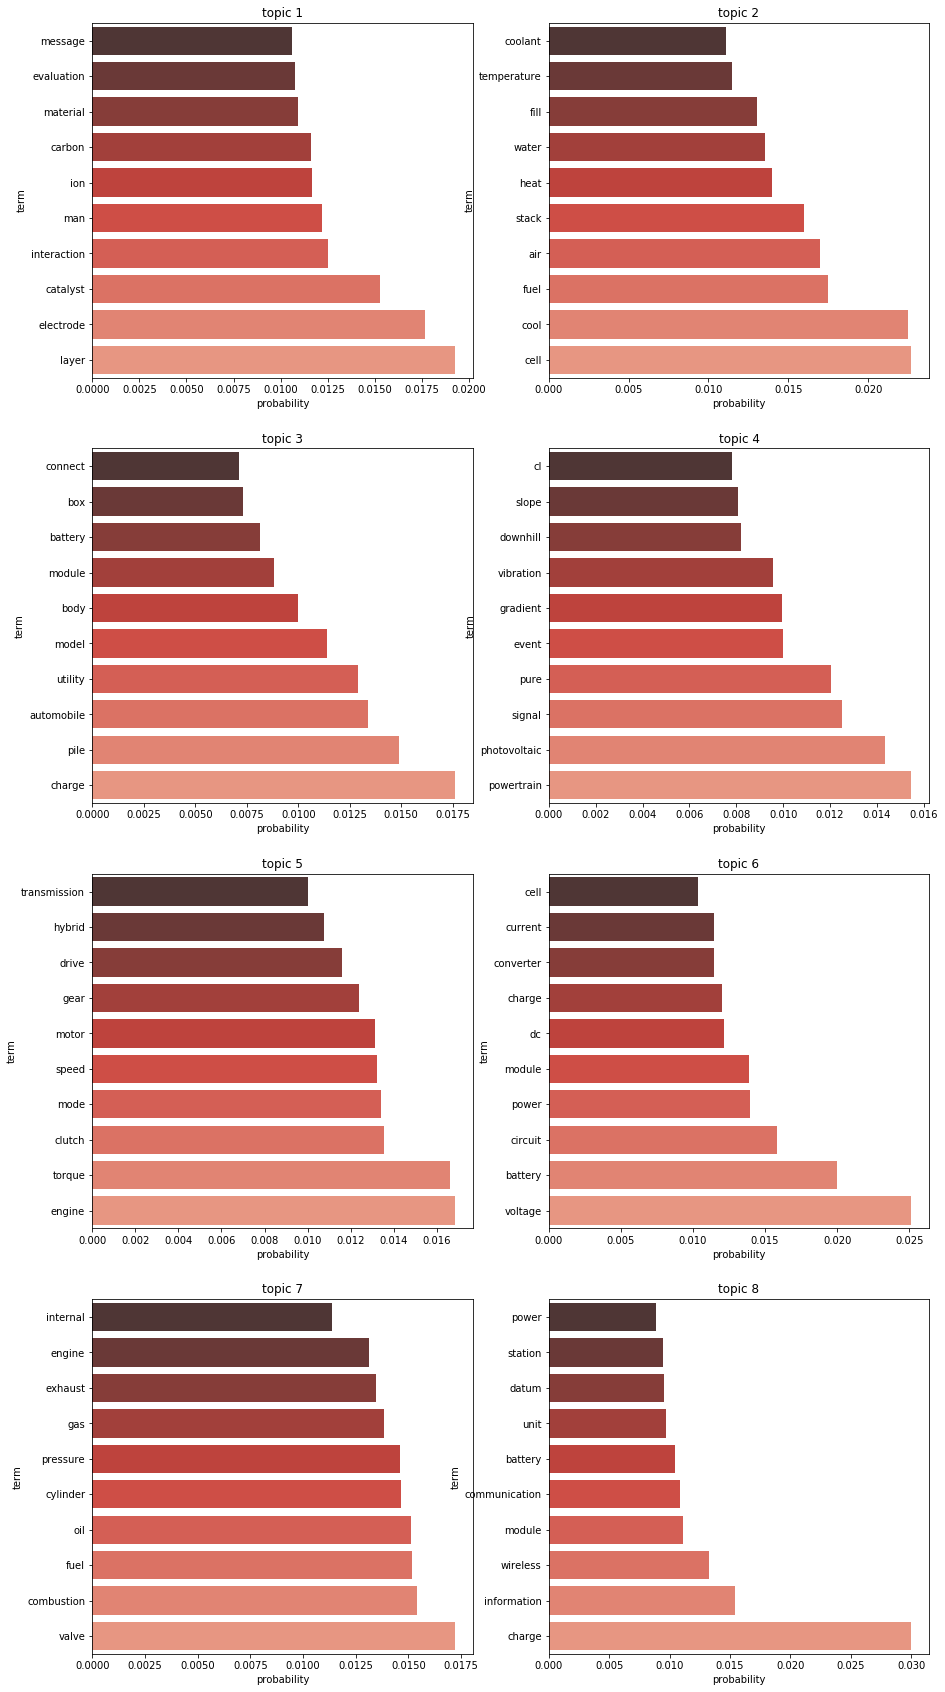

In [21]:
fiz=plt.figure(figsize=(15,30))
for i in range(8):
    df=pd.DataFrame(optimal_model.show_topic(i), columns=['term','prob']).set_index('term')
    df=df.sort_values('prob')
    
    plt.subplot(4,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='patents', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

### d)-PyVis

In [22]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus_tfidf, dictionary=optimal_model.id2word)
vis

C:\Program Files\Anaconda3\lib\site-packages\numexpr\cpuinfo.py:109: DeprecationWarning:

invalid escape sequence \d

C:\Program Files\Anaconda3\lib\site-packages\numexpr\cpuinfo.py:662: DeprecationWarning:

invalid escape sequence \s

C:\Program Files\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.086919 -0.117368       1        1  29.073275
5      0.092989  0.039456       2        1  15.827629
2      0.111148  0.202458       3        1  14.396774
7      0.148367 -0.020814       4        1  11.829598
6     -0.100871 -0.043824       5        1  10.217318
1     -0.098038  0.192180       6        1   9.295588
0     -0.289330 -0.040942       7        1   4.681036
3      0.048816 -0.211147       8        1   4.678791, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
4     Default  1735.000000          charge  1735.000000  30.0000  30.0000
172   Default   971.000000         voltage   971.000000  29.0000  29.0000
577   Default  1031.000000          torque  1031.000000  28.0000  28.0000
3     Default   879.000000            cell   879.000000  27.0000  27.0000
228   Default   471.000000            cool   471.000000  26.0000  26.0000
93    Default  1289.000000          engine  1289.000000  25.0000  25.0000
83    Default   790.000000          clutch   790.000000  24.0000  24.0000
67    Default  1014.000000            fuel  1014.000000  23.0000  23.0000
373   Default   589.000000             air   589.000000  22.0000  22.0000
1853  Default   438.000000            pile   438.000000  21.0000  21.0000
56    Default   412.000000           valve   412.000000  20.0000  20.0000
46    Default   571.000000      combustion   571.000000  19.0000  19.0000
124   Default   737.000000            gear   737.000000  18.0000  18.0000
193   Default   369.000000             oil   369.000000  17.0000  17.0000
898   Default   462.000000     information   462.000000  16.0000  16.0000
101   Default   999.000000          module   999.000000  15.0000  15.0000
1862  Default   311.000000        wireless   311.000000  14.0000  14.0000
552   Default   364.000000           stack   364.000000  13.0000  13.0000
584   Default   401.000000              dc   401.000000  12.0000  12.0000
1473  Default   294.000000        catalyst   294.000000  11.0000  11.0000
41    Default   493.000000         utility   493.000000  10.0000  10.0000
1621  Default   266.000000       electrode   266.000000   9.0000   9.0000
89    Default   326.000000        cylinder   326.000000   8.0000   8.0000
2     Default  1409.000000         battery  1409.000000   7.0000   7.0000
111   Default   848.000000           speed   848.000000   6.0000   6.0000
206   Default   682.000000         circuit   682.000000   5.0000   5.0000
246   Default   455.000000           brake   455.000000   4.0000   4.0000
985   Default   212.000000           layer   212.000000   3.0000   3.0000
68    Default   427.000000             gas   427.000000   2.0000   2.0000
360   Default   337.000000         exhaust   337.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
712    Topic8    30.249739  transformation    32.291054   2.9968  -5.7273
2122   Topic8    74.873352           slope    83.494057   2.9532  -4.8209
2501   Topic8    23.898193            tire    25.288044   3.0056  -5.9629
738    Topic8   111.980247            pure   134.706711   2.8774  -4.4184
1042   Topic8    35.001205         annular    38.283161   2.9725  -5.5814
2181   Topic8    53.263832            slow    61.107079   2.9248  -5.1615
1151   Topic8    49.711601      indicative    57.596985   2.9149  -5.2305
875    Topic8    49.042870       amplitude    56.807690   2.9152  -5.2440
1449   Topic8    92.720161           event   118.263031   2.8188  -4.6072
878    Topic8    56.050198            damp    66.770523   2.8871  -5.1105
1988   Topic8    59.027424            last    75.954018   2.8100  -5.0587
1471   Topic8    50.179890             sum    62.659595   2.8400  -5.2211
2663   Topic8    36.844872     disturbance    42.122948   2.9283  -5.5300
2787   Topic8

In [23]:
pyLDAvis.save_html(vis, 'topicmodel_pyvis.html')

### e)-Heatmap

In [24]:
def plot_difference(mdiff, title="", annotation=None):
    """
    Helper function to plot difference between models
    """
    annotation_html = None
    if annotation is not None:
        annotation_html = [["+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                            for (int_tokens, diff_tokens) in row]
                           for row in annotation]
        
    data = Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = Layout(width=950, height=950, title=title,
                       xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    
    figure2= go.Figure(dict(data=[data], layout=layout))
    py.plot(figure2,filename='heatmap.html') # saving results as html
    #py.iplot(dict(data=[data], layout=layout))

In [25]:
difference_matrix, annotation = optimal_model.diff(optimal_model, distance='jensen_shannon', num_words=50)
plot_difference(difference_matrix, title="Topic difference [jensen shannon distance]", annotation=annotation)

### f)-Dendrogram

In [26]:
from scipy import spatial as scs
from scipy.cluster import hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from gensim.matutils import jensen_shannon

# get topic distributions
topic_dist = optimal_model.state.get_lambda()

# get topic terms
num_words = 300
topic_terms = [{w for (w, _) in optimal_model.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]

# no. of terms to display in annotation
n_ann_terms = 8

# use Jensen-Shannon distance metric in dendrogram
def js_dist(X):
    return pdist(X, lambda u, v: jensen_shannon(u, v))

# define method for distance calculation in clusters
linkagefun=lambda x: sch.linkage(x, 'single')

# calculate text annotations
def text_annotation(topic_dist, topic_terms, n_ann_terms, linkagefun):
    # get dendrogram hierarchy data
    linkagefun = lambda x: sch.linkage(x, 'single')
    d = js_dist(topic_dist)
    Z = linkagefun(d)
    P = sch.dendrogram(Z, orientation="bottom", no_plot=True)

    # store topic no.(leaves) corresponding to the x-ticks in dendrogram
    x_ticks = np.arange(5, len(P['leaves']) * 10 + 5, 10)
    x_topic = dict(zip(P['leaves'], x_ticks))

    # store {topic no.:topic terms}
    topic_vals = dict()
    for key, val in x_topic.items():
        topic_vals[val] = (topic_terms[key], topic_terms[key])

    text_annotations = []
    # loop through every trace (scatter plot) in dendrogram
    for trace in P['icoord']:
        fst_topic = topic_vals[trace[0]]
        scnd_topic = topic_vals[trace[2]]
        
        # annotation for two ends of current trace
        pos_tokens_t1 = list(fst_topic[0])[:min(len(fst_topic[0]), n_ann_terms)]
        neg_tokens_t1 = list(fst_topic[1])[:min(len(fst_topic[1]), n_ann_terms)]

        pos_tokens_t4 = list(scnd_topic[0])[:min(len(scnd_topic[0]), n_ann_terms)]
        neg_tokens_t4 = list(scnd_topic[1])[:min(len(scnd_topic[1]), n_ann_terms)]

        t1 = "<br>".join((": ".join(("+++", str(pos_tokens_t1))), ": ".join(("---", str(neg_tokens_t1)))))
        t2 = t3 = ()
        t4 = "<br>".join((": ".join(("+++", str(pos_tokens_t4))), ": ".join(("---", str(neg_tokens_t4)))))

        # show topic terms in leaves
        if trace[0] in x_ticks:
            t1 = str(list(topic_vals[trace[0]][0])[:n_ann_terms])
        if trace[2] in x_ticks:
            t4 = str(list(topic_vals[trace[2]][0])[:n_ann_terms])

        text_annotations.append([t1, t2, t3, t4])

        # calculate intersecting/diff for upper level
        intersecting = fst_topic[0] & scnd_topic[0]
        different = fst_topic[0].symmetric_difference(scnd_topic[0])

        center = (trace[0] + trace[2]) / 2
        topic_vals[center] = (intersecting, different)

        # remove trace value after it is annotated
        topic_vals.pop(trace[0], None)
        topic_vals.pop(trace[2], None)  
        
    return text_annotations

# get text annotations
annotation = text_annotation(topic_dist, topic_terms, n_ann_terms, linkagefun)

In [27]:
# Plot dendrogram
dendro = ff.create_dendrogram(topic_dist, distfun=js_dist, labels=range(0, 8), linkagefun=linkagefun, hovertext=annotation)
dendro['layout'].update({'width': 1000, 'height': 600})
py.iplot(dendro)

In [28]:
# saving results as html
py.plot(dendro,filename='Dendrogram.html')

'Dendrogram.html'

### g)-t-SNE

In [29]:
hm = np.array([[y for (x,y) in optimal_model[corpus_tfidf[i]]] for i in range(len(corpus_tfidf))])

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=2017, perplexity=30)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

In [31]:
year=patent['year']

In [32]:
source = ColumnDataSource(
        data=dict(
            x = embedding.x,
            y = embedding.y,
            colors = [all_palettes['Set1'][8][i] for i in embedding.hue],
            title = patent.appln_title,
            year = year,
            alpha = [0.9] * embedding.shape[0],
            size = [7] * embedding.shape[0]
        )
    )
hover_tsne = HoverTool(names=["df"], tooltips="""
    <div style="margin: 10">
        <div style="margin: 0 auto; width:300px;">
            <span style="font-size: 12px; font-weight: bold;">Title:</span>
            <span style="font-size: 12px">@title</span>
            <span style="font-size: 12px; font-weight: bold;">Year:</span>
            <span style="font-size: 12px">@year</span>
        </div>
    </div>
    """)
tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(plot_width=700, plot_height=700, tools=tools_tsne, title='Papers')
plot_tsne.circle('x', 'y', size='size', fill_color='colors', 
                 alpha='alpha', line_alpha=0, line_width=0.01, source=source, name="df")

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    x = data['x']
    y = data['y']
    colors = data['colors']
    alpha = data['alpha']
    title = data['title']
    year = data['year']
    size = data['size']
    for (i = 0; i < x.length; i++) {
        if (year[i] <= f) {
            alpha[i] = 0.9
            size[i] = 7
        } else {
            alpha[i] = 0.05
            size[i] = 4
        }
    }
    source.trigger('change');
""")

slider = Slider(start=year.min(), end=year.max(), value=2017, step=1, title="Before year")
slider.js_on_change('value', callback)

layout = column(slider, plot_tsne)

In [33]:
show(layout)

In [35]:
from bokeh.plotting import figure, output_file, save
output_file("tsne.html")
save(plot_tsne)

'C:\\Users\\69785hsh\\Downloads\\Data Science\\Learning Projects\\Phd_patents\\ecosystem-paper\\tsne.html'

**working on paper will be in next notebook**